In [2]:
import pandas as pd 
import matplotlib 
from matplotlib import pyplot as plt 
%matplotlib inline 
matplotlib.rcParams['figure.figsize']=(12,8)

In [3]:
df=pd.read_csv('bhp.csv')
df.shape

(13200, 7)

In [4]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [5]:
lower_limit,upper_limit=df.price_per_sqft.quantile([0.001,0.999])
lower_limit,upper_limit

(1366.184, 50959.36200000098)

In [6]:
df2=df[(df.price_per_sqft<upper_limit)&(df.price_per_sqft>lower_limit)]
df2.shape


(13172, 7)

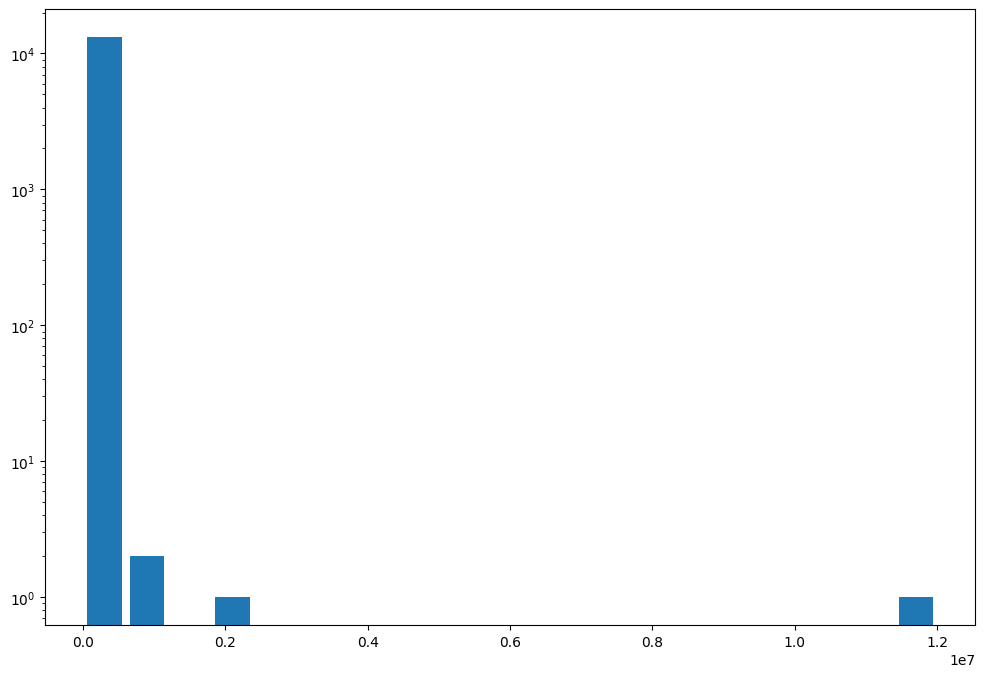

In [25]:
plt.hist(df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.yscale('log')
plt.show()

In [8]:
min_limit=df2.price_per_sqft.mean()-4*df2.price_per_sqft.std() 
max_limit=df2.price_per_sqft.mean()+4*df2.price_per_sqft.std() 
min_limit,max_limit

(-9900.429065502582, 23227.73653589432)

In [9]:
df3=df2[(df2.price_per_sqft > min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

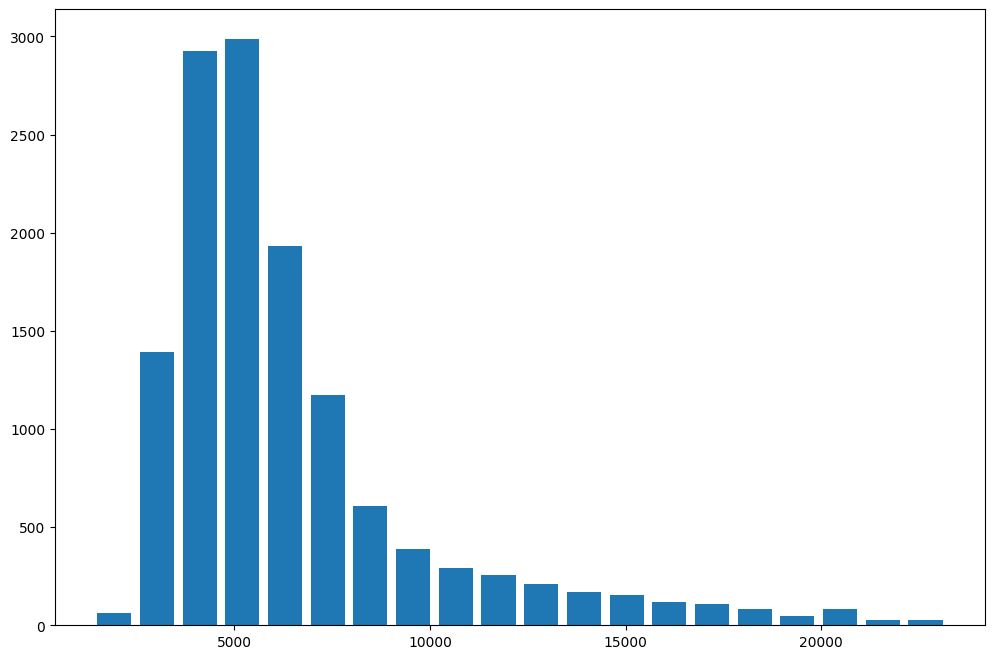

In [10]:
plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel='price_per_sqft'
plt.ylabel='count'
plt.show()

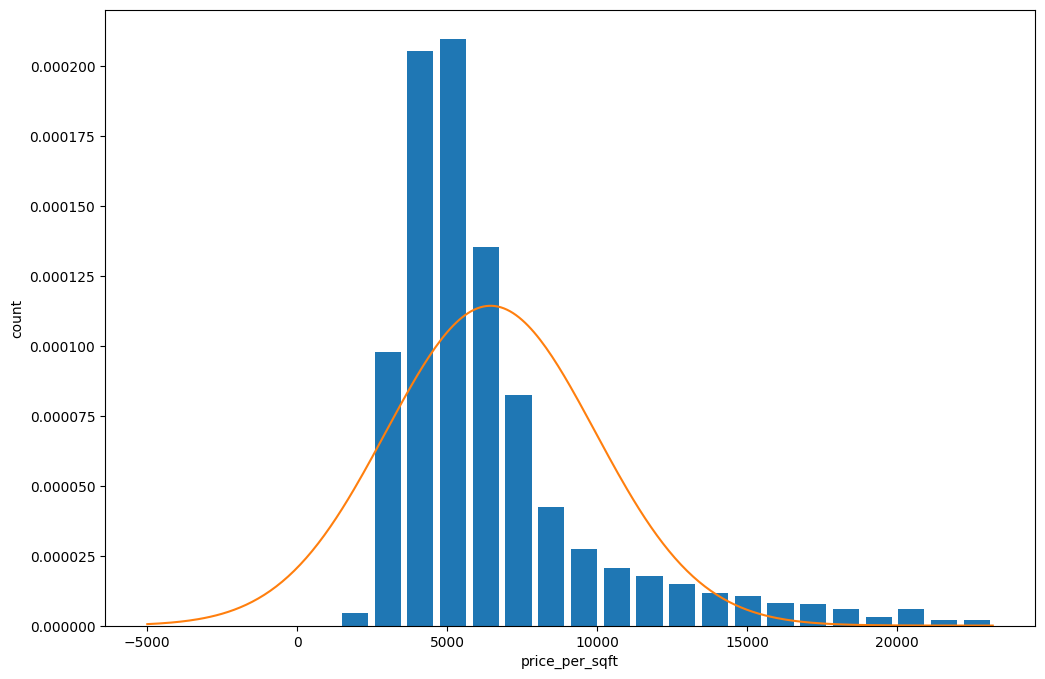

In [20]:
import numpy as np 
from scipy.stats import norm 
import matplotlib.pyplot as plt

plt.xlabel=plt.gca().set_xlabel
plt.ylabel=plt.gca().set_ylabel 

plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8,density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

rng=np.arange(-5000,df3.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

zscore=(observed variable - mean )/ std

In [23]:
df2['zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std() 
df2.sample(10)

C:\Users\KRISHNAVENI\AppData\Local\Temp\ipykernel_18176\526107273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5864,other,2 BHK,1116.0,2.0,37.60,2,3369,-0.795614
8065,Hosakerehalli,3 BHK,1410.0,2.0,53.58,3,3800,-0.691533
9424,Whitefield,4 Bedroom,2000.0,4.0,312.00,4,15600,2.158006
7547,Attibele,2 BHK,995.0,1.0,24.88,2,2500,-1.005466
12547,Kodigehaali,3 BHK,1442.0,3.0,80.00,3,5547,-0.269657
8656,other,2 BHK,1152.0,2.0,57.00,2,4947,-0.414548
13137,Whitefield,3 BHK,1453.0,2.0,58.00,3,3991,-0.645409
8561,Thigalarapalya,3 BHK,2072.0,4.0,157.00,3,7577,0.220561
7588,8th Phase JP Nagar,4 BHK,1200.0,3.0,110.00,4,9166,0.604282
2169,other,2 BHK,900.0,2.0,42.00,2,4666,-0.482406


In [24]:
df2=df2[(df2.zscore>-4) & (df2.zscore<4)]
df2.shape


(13047, 8)